# Draft. This jupyter notebook was used to review data files and try to learn insights from the data

## import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
CALL_COST = 400 / 0.1
DATA_FOLDER = 'idao_2021_train/'

In [3]:
df_balance = pd.read_csv(f'{DATA_FOLDER}/balance.csv')
df_client = pd.read_csv(f'{DATA_FOLDER}/client.csv')
df_com = pd.read_csv(f'{DATA_FOLDER}/com.csv')
df_appl = pd.read_csv(f'{DATA_FOLDER}/appl.csv')
df_aum = pd.read_csv(f'{DATA_FOLDER}/aum.csv')
df_payments = pd.read_csv(f'{DATA_FOLDER}/payments.csv')
df_mcc = pd.read_csv(f'{DATA_FOLDER}/dict_mcc.csv')
df_funnel = pd.read_csv(f'{DATA_FOLDER}/funnel.csv')
df_deals = pd.read_csv(f'{DATA_FOLDER}/deals.csv')
df_trxn = pd.read_csv(f'{DATA_FOLDER}/trxn.csv')

/Users/yaourt/miniconda3/envs/idao/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_trxn.columns

Index(['client_id', 'card_id', 'tran_time', 'tran_amt_rur', 'mcc_cd',
       'merchant_cd', 'txn_country', 'txn_city', 'tsp_name', 'txn_comment_1',
       'txn_comment_2'],
      dtype='object')

In [5]:
print(df_balance.shape, df_client.shape, df_com.shape, df_appl.shape, df_aum.shape)
print(df_payments.shape, df_mcc.shape, df_funnel.shape, df_deals.shape, df_trxn.shape)

(1194684, 9) (21498, 8) (113055, 10) (12030, 6) (117392, 4)
(188068, 4) (915, 3) (21498, 16) (109016, 8) (3035705, 11)


## funnel

### selection

In [6]:
df_funnel.sample(5)

,client_id,sale_flg,sale_amount,contacts,feature_1,client_segment,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,region_cd
8377,5943882567588849330,0,NaN,1,1,14.0,3642369.0,2596.0,9865.0,0.0,15488.0,120198.0,84139.0,10.9,2607.0,16.0
21478,-6427468191296496064,0,NaN,3,2,1.0,6070615.0,62203.0,13814.0,69058.0,21277.0,3075374.0,2641746.0,7.9,62210.0,86.0
529,-8076530053713895064,0,NaN,1,5,13.0,1245763.0,34258.0,0.0,0.0,0.0,1245690.0,1091753.0,11.9,28280.0,54.0
10530,6475605197775032447,0,NaN,1,5,14.0,3642369.0,2100.0,25001.0,0.0,62347.0,97130.0,74715.0,10.9,2107.0,76.0
3948,-1009585223108911229,0,NaN,1,8,14.0,2428246.0,1021727.0,166798.0,0.0,340882.0,2428246.0,2209505.0,17.9,61529.0,38.0


In [7]:
df_funnel = df_funnel.fillna(0)

In [8]:
df_funnel['nic'] = df_funnel['sale_flg']*df_funnel['sale_amount']  - CALL_COST*df_funnel['contacts']
sum(df_funnel['nic'] == 0)

0

In [9]:
# remove clients with NaN education
df_funnel = df_funnel.set_index('client_id')
cid_nan_edu = df_client[~df_client.education.isna()].client_id
df_funnel = df_funnel.loc[cid_nan_edu]

In [10]:
df_funnel.sale_amount.unique()

array([138018.05, 121907.95,      0.  , ...,  50289.7 ,  52367.45,
        43882.85])

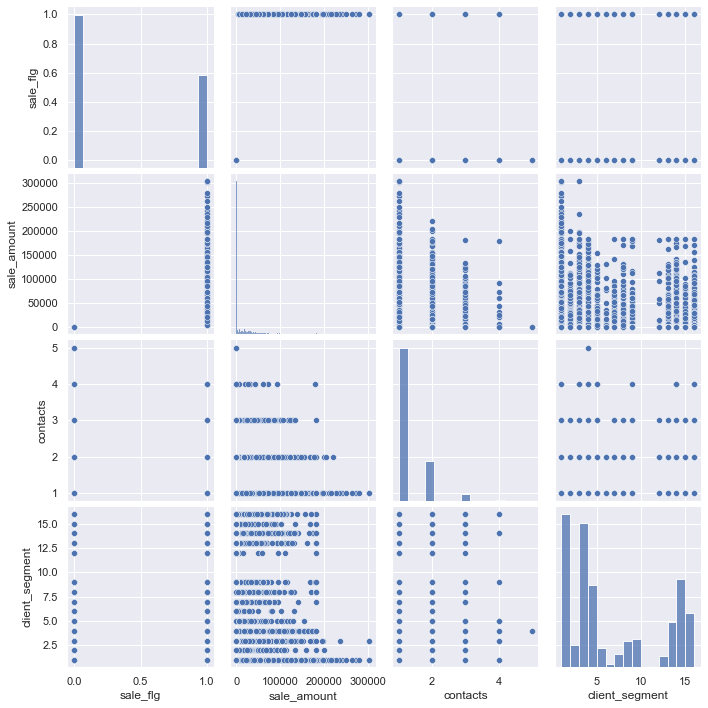

In [11]:
sns.pairplot(df_funnel[['sale_flg', 'sale_amount', 'contacts', 'client_segment']])

### NIC

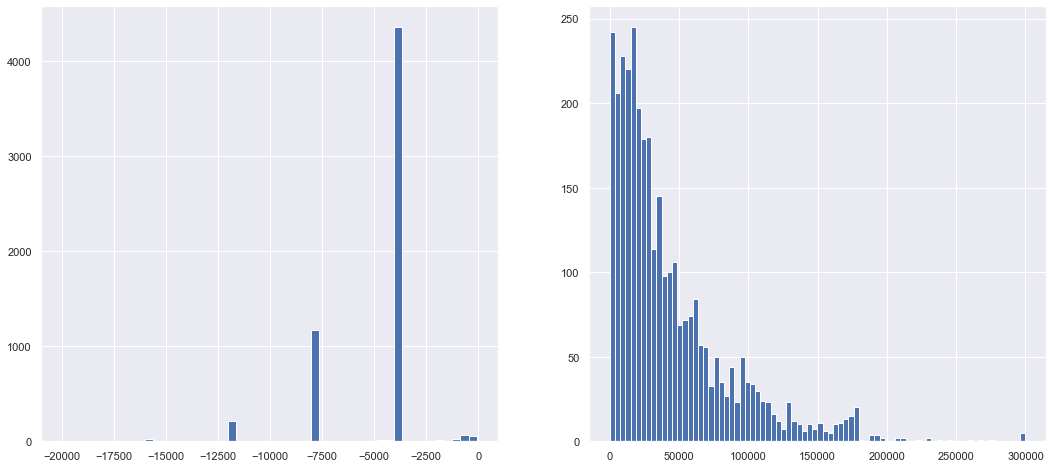

In [12]:
fig, axs = plt.subplots(1,2, figsize=(18,8))
axs[0].hist(df_funnel.query('nic < 0')['nic'], bins=50)
axs[1].hist(df_funnel.query('nic >= 0')['nic'], bins=80)
plt.show()

In [13]:
df_funnel.query('nic > 0')[['sale_flg']].value_counts()

sale_flg
1           3302
dtype: int64

In [14]:
df_funnel.query('nic < 0')[['sale_flg']].value_counts()

sale_flg
0           5770
1            208
dtype: int64

In [15]:
df_funnel.query('nic < 0 and nic % 4000 != 0')[['sale_flg']].value_counts()

sale_flg
1           208
dtype: int64

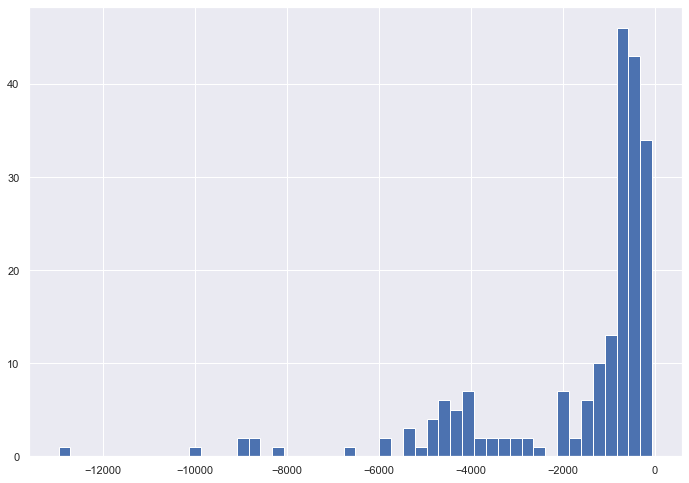

In [16]:
plt.hist(df_funnel.query('nic < 0 and nic % 4000 != 0')[['nic']], bins=50)
plt.show()

In [17]:
sum(df_funnel['nic'])

113150771.55

In [18]:
sum(df_funnel.query('nic < 0 and nic % 4000 != 0')['nic'])

-347978.5499999999

In [19]:
sum(df_funnel.query('nic < 0')['nic'])

-30191978.549999975

### region

In [20]:
df_funnel.query('sale_flg == 1').region_cd.value_counts()

86.0    851
54.0    196
77.0    164
59.0    143
50.0    138
       ... 
79.0      4
41.0      3
25.0      2
19.0      2
83.0      1
Name: region_cd, Length: 73, dtype: int64

In [21]:
df_funnel.query('sale_flg == 0').region_cd.value_counts()

86.0    797
54.0    301
77.0    301
66.0    279
78.0    249
       ... 
79.0      4
19.0      3
15.0      2
89.0      2
14.0      1
Name: region_cd, Length: 73, dtype: int64

## noname features

### insights from feature importance

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
import lightgbm as lgb
import shap

In [23]:
lgb_params = {
 'boosting_type': 'gbdt',
 'objective': 'binary',
 'metric': 'binary_logloss',
 'max_depth': 5,
 'learning_rate': 0.1,
 'feature_fraction': 0.9,
 'bagging_fraction': 0.8,
 'bagging_freq': 5,
 'early_stopping': 10,
 'verbose': -1,
 'seed': 777
}

In [24]:
X = df_funnel[['feature_1', 'feature_2', 'feature_3',
               'feature_4', 
    'feature_5',
               'feature_6', 'feature_7', 'feature_8', 
               'feature_9',
               'feature_10',
]]
y = df_funnel.sale_flg

In [25]:
# w = len(y) / np.bincount(y)
# weights = np.where(y, w[1], w[0])

In [26]:
# X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y, weights, test_size=0.33, random_state=42, stratify=y)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [27]:
lgb_train = lgb.Dataset(X_train, y_train, weight=None, free_raw_data=False)
lgb_test = lgb.Dataset(X_test, y_test, weight=None, reference=lgb_train, free_raw_data=False)
clf = lgb.train(
                lgb_params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_test,
               )

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's binary_logloss: 0.65243
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.643052
[3]	valid_0's binary_logloss: 0.635889
[4]	valid_0's binary_logloss: 0.630739
[5]	valid_0's binary_logloss: 0.626103
[6]	valid_0's binary_logloss: 0.622817
[7]	valid_0's binary_logloss: 0.620094
[8]	valid_0's binary_logloss: 0.617122
[9]	valid_0's binary_logloss: 0.615124
[10]	valid_0's binary_logloss: 0.613355
[11]	valid_0's binary_logloss: 0.612238
[12]	valid_0's binary_logloss: 0.610865
[13]	valid_0's binary_logloss: 0.610305
[14]	valid_0's binary_logloss: 0.60984
[15]	valid_0's binary_logloss: 0.609247
[16]	valid_0's binary_logloss: 0.608307
[17]	valid_0's binary_logloss: 0.607307
[18]	valid_0's binary_logloss: 0.607479
[19]	valid_0's binary_logloss: 0.607339
[20]	valid_0's binary_logloss: 0.607021
[21]	valid_0's binar

Found `early_stopping` in params. Will use it instead of argument


In [28]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [29]:
roc_auc_score(y_train, y_train_pred), roc_auc_score(y_test, y_test_pred)

(0.780357028511274, 0.6981859180255363)

In [30]:
# print(classification_report(y_train, y_train_pred > 0.5))

In [31]:
print(classification_report(y_test, y_test_pred > 0.5))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75      1904
           1       0.58      0.40      0.47      1159

    accuracy                           0.66      3063
   macro avg       0.64      0.61      0.61      3063
weighted avg       0.65      0.66      0.65      3063



In [32]:
print(classification_report(y_test, y_test_pred > 0.5))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75      1904
           1       0.58      0.40      0.47      1159

    accuracy                           0.66      3063
   macro avg       0.64      0.61      0.61      3063
weighted avg       0.65      0.66      0.65      3063



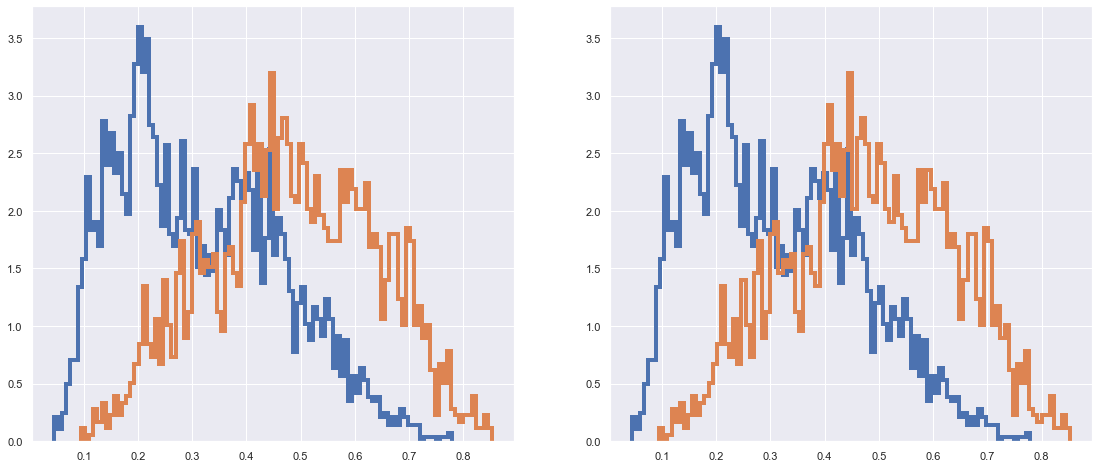

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(19,8))
axs[0].hist(y_train_pred[y_train==0], bins=100, density=True, histtype='step', linewidth=4)
axs[0].hist(y_train_pred[y_train==1], bins=100, density=True, histtype='step', linewidth=4)
axs[1].hist(y_train_pred[y_train==0], bins=100, density=True, histtype='step', linewidth=4)
axs[1].hist(y_train_pred[y_train==1], bins=100, density=True, histtype='step', linewidth=4)
plt.show()

In [34]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


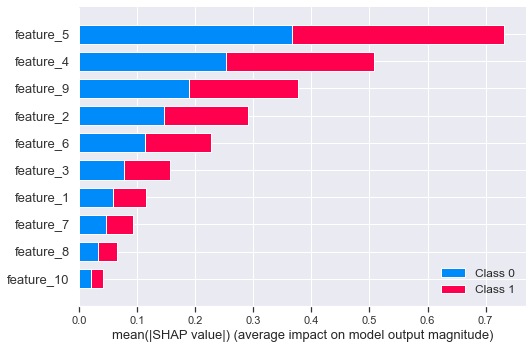

In [35]:
shap.summary_plot(shap_values, X)

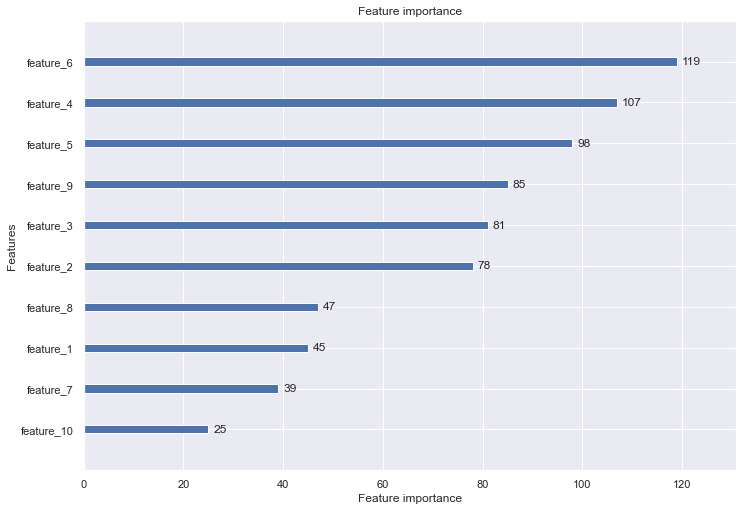

In [36]:
lgb.plot_importance(clf)
plt.show()

### joint plots

In [37]:
df_funnel.sample(5)

,sale_flg,sale_amount,contacts,feature_1,client_segment,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,region_cd,nic
client_id,,,,,,,,,,,,,,,,
-4098589863068527393,1,19881.95,1,10,3.0,6070615.0,92340.0,0.0,64652.0,47363.0,4565102.0,4153869.0,7.9,92345.0,72.0,15881.95
-3800879198050978878,0,0.00,1,4,13.0,3642369.0,1808.0,0.0,0.0,6232.0,84989.0,65376.0,9.9,1817.0,16.0,-4000.00
-6259722264063605412,1,52682.20,1,4,4.0,3642369.0,28396.0,27836.0,0.0,45643.0,1403526.0,259311.0,7.9,28391.0,61.0,48682.20
2903724758311312844,1,131726.65,1,5,6.0,3642369.0,165447.0,50031.0,0.0,209305.0,3642369.0,2209644.0,9.4,78108.0,86.0,127726.65
5034303583573327776,0,0.00,3,3,3.0,6070615.0,24592.0,56847.0,15085.0,90630.0,1201982.0,115595.0,7.4,24603.0,73.0,-12000.00


Dataset has 0 variance; skipping density estimate.


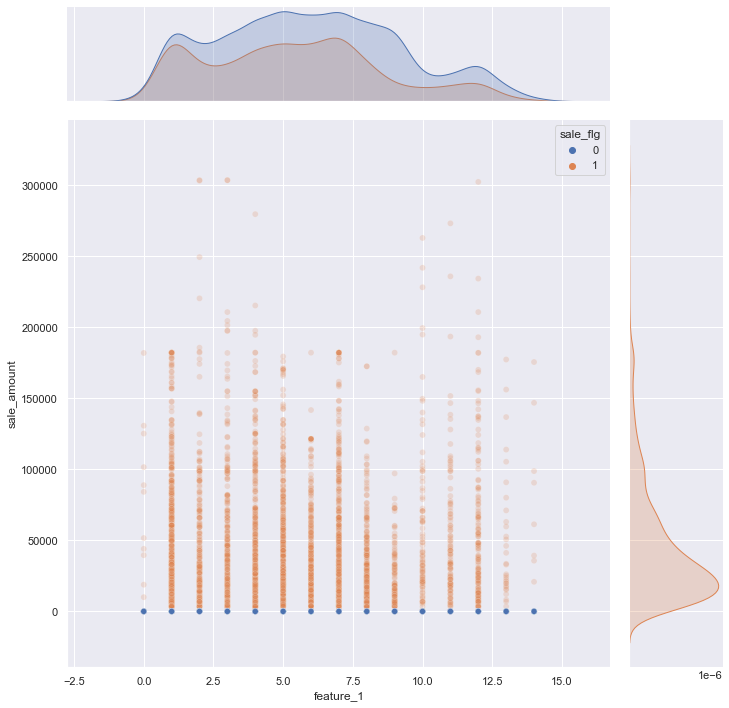

In [38]:
feature = 'feature_1'
jplt = sns.jointplot(x=feature, y='sale_amount', data=df_funnel, hue='sale_flg', alpha=0.2, height=10) # .query('sale_flg == 1')
# jplt.ax_marg_x.set_xlim(0, 1e7)
# jplt.ax_marg_y.set_xlim(0, 3e5)
plt.xlabel('sale_amount')
plt.ylabel(feature)
plt.show()

### feature 2

In [39]:
df_funnel.feature_2.value_counts()

6070615.0    2381
3642369.0    1902
2428246.0     892
1821184.0     356
0.0           199
             ... 
4042263.0       1
1067828.0       1
341693.0        1
742121.0        1
1074967.0       1
Name: feature_2, Length: 2922, dtype: int64

In [40]:
df_funnel.sale_flg.value_counts()

0    5770
1    3510
Name: sale_flg, dtype: int64

In [41]:
df_funnel.query('feature_2 == 3642369.0').sale_flg.value_counts()

0    1220
1     682
Name: sale_flg, dtype: int64

In [42]:
df_funnel.query('feature_2 == 6070615.0').sale_flg.value_counts()

0    1525
1     856
Name: sale_flg, dtype: int64

In [43]:
df_funnel.query('feature_2 == 2428246.0').sale_flg.value_counts()

0    593
1    299
Name: sale_flg, dtype: int64

In [44]:
df_funnel.query('feature_2 == 1821184.0').sale_flg.value_counts()

0    311
1     45
Name: sale_flg, dtype: int64

In [45]:
df_funnel.query('~(feature_2 == 1821184.0 or feature_2 == 2428246.0 or feature_2 == 6070615.0 or feature_2 == 3642369.0)').sale_flg.value_counts()

0    2121
1    1628
Name: sale_flg, dtype: int64

## balance

In [46]:
df_balance.sample(5)

,client_id,crncy_cd,eop_bal_sum_rur,min_bal_sum_rur,max_bal_sum_rur,avg_bal_sum_rur,month_end_dt,prod_cat_name,prod_group_name
551069,-6399530399676774700,810.0,0.0,0.0,0.0,0.0,2018-10-31,KN,Salary cards
373792,5201865934100634173,840.0,0.0,0.0,0.0,0.0,2019-04-30,DEPOSITS,Time deposits
229553,-2310017577502220445,810.0,0.0,0.0,0.0,0.0,2019-04-30,CURRENT ACCOUNTS,Cash on demand
421734,-4071916414225378001,810.0,0.0,0.0,0.0,0.0,2019-05-31,DEPOSITS,Time deposits
470266,-2717619842847128620,810.0,0.0,0.0,0.0,0.0,2019-02-28,DEPOSITS,Time deposits


In [47]:
df_balance.prod_cat_name.value_counts()

KN                        575203
CURRENT ACCOUNTS          302334
DEPOSITS                  174921
SALARY CARDS               71497
DEBIT CARDS                38824
CREDIT CARDS               17224
MORTGAGE                    7080
TECHNICAL CARDS             3587
CAR LOANS                   1092
Cash on demand               312
CREDITS IN CASH OR           312
CASH CREDITS (X-SALE)        264
OTHER MORTGAGE                48
VIP DEBIT CARDS               24
URGENT DEPOSITS BIN           24
LENDING SALARY CLIENTS        12
VIP CREDIT CARDS              12
LOANS FOR EMPLOYEES           12
PREAD MAP                     12
Name: prod_cat_name, dtype: int64

In [48]:
df_balance.crncy_cd.value_counts()

810.0    1148838
840.0      28007
978.0      15354
500.0        552
826.0        446
98.0         190
99.0         120
578.0         96
33.0          68
76.0          41
392.0         36
156.0         24
756.0         12
124.0         12
Name: crncy_cd, dtype: int64

In [49]:
df_balance.month_end_dt.value_counts()

2019-08-31    106386
2019-07-31    105252
2019-06-30    104320
2019-05-31    103358
2019-04-30    102478
2019-03-31    101640
2019-02-28     99744
2019-01-31     98172
2018-12-31     97017
2018-11-30     95155
2018-10-31     91962
2018-09-30     89200
Name: month_end_dt, dtype: int64

In [50]:
sum(df_balance.min_bal_sum_rur == 0), df_balance.shape

(1035779, (1194684, 9))

## payments

In [51]:
df_payments

,client_id,day_dt,sum_rur,pmnts_name
0,-1893104556496814867,2019-06-29,6071.0,Salary receipts
1,-1893104556496814867,2019-08-13,45641.0,Salary receipts
2,-1893104556496814867,2018-10-22,6071.0,Salary receipts
3,-1893104556496814867,2018-09-26,6071.0,Salary receipts
4,-1893104556496814867,2018-09-10,5872.0,Salary receipts
...,...,...,...,...
188063,-8727103852075923180,2019-05-29,12141.0,Pension receipts
188064,-8727103852075923180,2019-06-04,6071.0,Pension receipts
188065,-8727103852075923180,2019-07-01,12141.0,Pension receipts
188066,4662551505651924284,2019-06-01,12141.0,Pension receipts


In [52]:
df_payments = df_payments.set_index('client_id')

In [53]:
df_payments.pmnts_name.value_counts()

Salary receipts     181662
Pension receipts      6406
Name: pmnts_name, dtype: int64

### salaries

In [54]:
mean_salaries = df_payments.groupby('client_id').sum_rur.mean()
mean_salaries

client_id
-9220236243053692422    15737.333333
-9220233431709087652    32787.000000
-9219699286371310531     4629.636364
-9218871523310554579    15783.120000
-9217476774110203314     3614.833333
                            ...     
 9217721824424937511     7899.333333
 9218801691173598782    13808.576923
 9219024469308275500     7467.200000
 9220335314469087849    15792.523810
 9223107459698100059     8081.333333
Name: sum_rur, Length: 8954, dtype: float64

<AxesSubplot:>

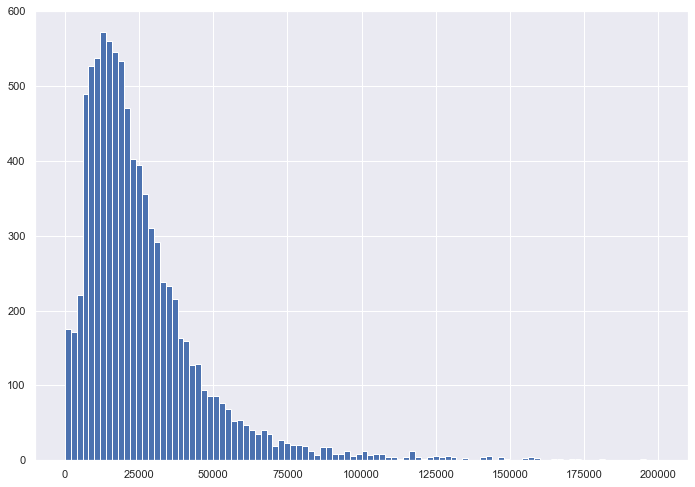

In [55]:
mean_salaries.hist(bins=100, range=(0, 200000))

In [56]:
df_payments['month'] = pd.to_datetime(df_payments.day_dt).dt.month

In [57]:
df_payments.groupby(['client_id', 'month']).sum_rur.sum().loc[-9220236243053692422].std()

16875.954453007984

In [58]:
std_salaries = df_payments.groupby(['client_id', 'month']).sum_rur.sum().std(level=0)

In [59]:
sale_flg = df_funnel.loc[np.intersect1d(std_salaries.index, df_funnel.index)].sale_flg

Text(0.5, 1.0, 'std salary')

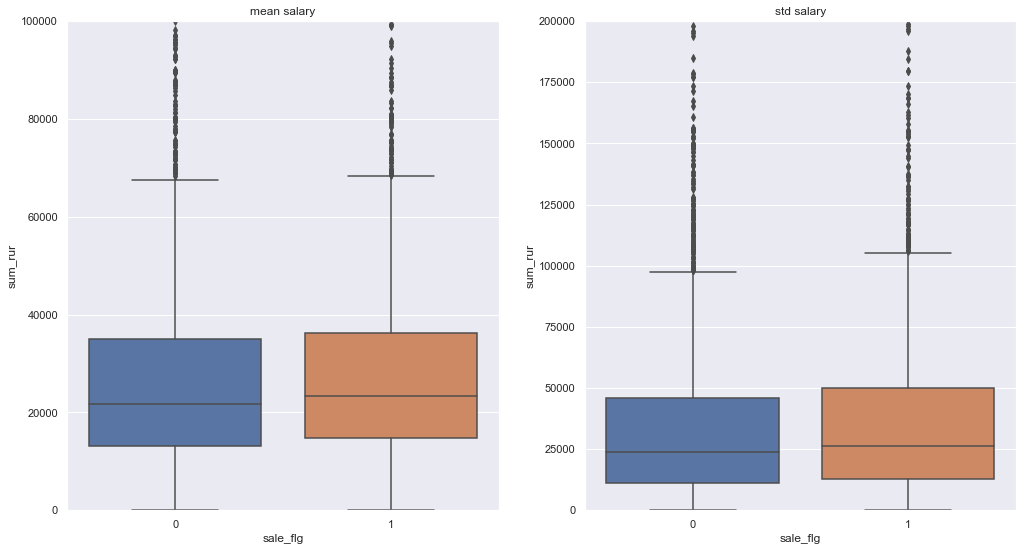

In [60]:
fig, axs = plt.subplots(1,2, figsize=(17, 9))
sns.boxplot(x=sale_flg, y=mean_salaries, ax=axs[0])
axs[0].set_ylim(0, 1e5)
axs[0].set_title('mean salary')
#
sns.boxplot(x=sale_flg, y=std_salaries, ax=axs[1])
axs[1].set_ylim(0, 2e5)
axs[1].set_title('std salary')

In [61]:
count_salaries = df_payments.query('pmnts_name == "Salary receipts"').groupby('client_id').sum_rur.count()
count_salaries

client_id
-9220236243053692422     9
-9220233431709087652    23
-9219699286371310531    11
-9218871523310554579    25
-9217476774110203314     6
                        ..
 9217721824424937511    24
 9218801691173598782    26
 9219024469308275500    20
 9220335314469087849    19
 9223107459698100059    12
Name: sum_rur, Length: 8800, dtype: int64

<AxesSubplot:>

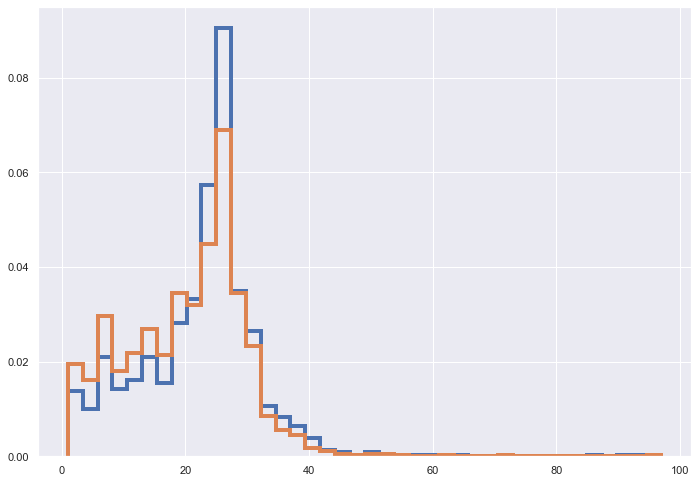

In [62]:
count_salaries.loc[np.intersect1d(df_funnel.query('sale_flg == 1').index, count_salaries.index)].hist(bins=40, density=True, histtype='step', linewidth=4)
count_salaries.loc[np.intersect1d(df_funnel.query('sale_flg == 0').index, count_salaries.index)].hist(bins=40, density=True, histtype='step', linewidth=4)

### pensions

In [63]:
df_payments

,day_dt,sum_rur,pmnts_name,month
client_id,,,,
-1893104556496814867,2019-06-29,6071.0,Salary receipts,6
-1893104556496814867,2019-08-13,45641.0,Salary receipts,8
-1893104556496814867,2018-10-22,6071.0,Salary receipts,10
-1893104556496814867,2018-09-26,6071.0,Salary receipts,9
-1893104556496814867,2018-09-10,5872.0,Salary receipts,9
...,...,...,...,...
-8727103852075923180,2019-05-29,12141.0,Pension receipts,5
-8727103852075923180,2019-06-04,6071.0,Pension receipts,6
-8727103852075923180,2019-07-01,12141.0,Pension receipts,7


In [64]:
cid_pension = np.intersect1d(df_payments.query('pmnts_name == "Pension receipts"').index.unique(), df_funnel.index)

In [65]:
df_funnel.loc[cid_pension].sale_flg.value_counts() / len(cid_pension)

0    0.5625
1    0.4375
Name: sale_flg, dtype: float64

In [66]:
count_pension = df_payments.query('pmnts_name == "Pension receipts"').groupby('client_id').sum_rur.count()
count_pension

client_id
-9216473704060526660     3
-9210484825961669240     2
-9209732247128824451    11
-9198654031673722494     9
-9197872890596891221     2
                        ..
 9157380216762169201    11
 9175438673891918463     3
 9178680470928980533     2
 9182169606313054731     2
 9220335314469087849     2
Name: sum_rur, Length: 1202, dtype: int64

<AxesSubplot:>

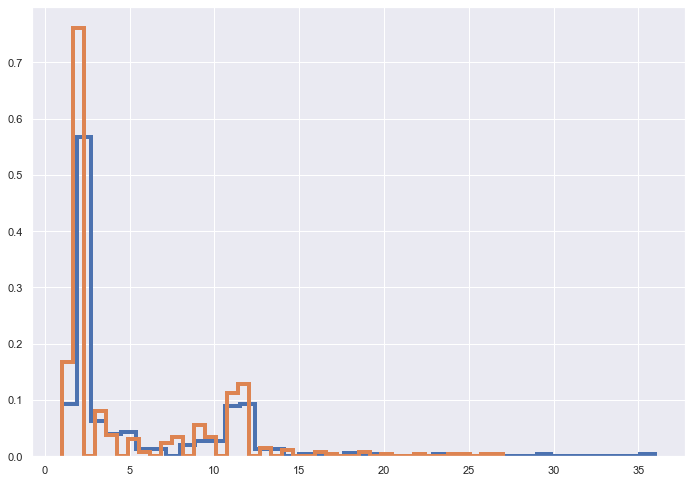

In [67]:
count_pension.loc[np.intersect1d(df_funnel.query('sale_flg == 1').index, count_pension.index)].hist(bins=40, density=True, histtype='step', linewidth=4)
count_pension.loc[np.intersect1d(df_funnel.query('sale_flg == 0').index, count_pension.index)].hist(bins=40, density=True, histtype='step', linewidth=4)

In [68]:
min_pension = df_payments.query('pmnts_name == "Pension receipts"').groupby('client_id').sum_rur.min()
min_pension

client_id
-9216473704060526660     6071.0
-9210484825961669240    24282.0
-9209732247128824451     3609.0
-9198654031673722494    23939.0
-9197872890596891221    12141.0
                         ...   
 9157380216762169201     3609.0
 9175438673891918463     6071.0
 9178680470928980533    12141.0
 9182169606313054731    24282.0
 9220335314469087849    12141.0
Name: sum_rur, Length: 1202, dtype: float64

<AxesSubplot:>

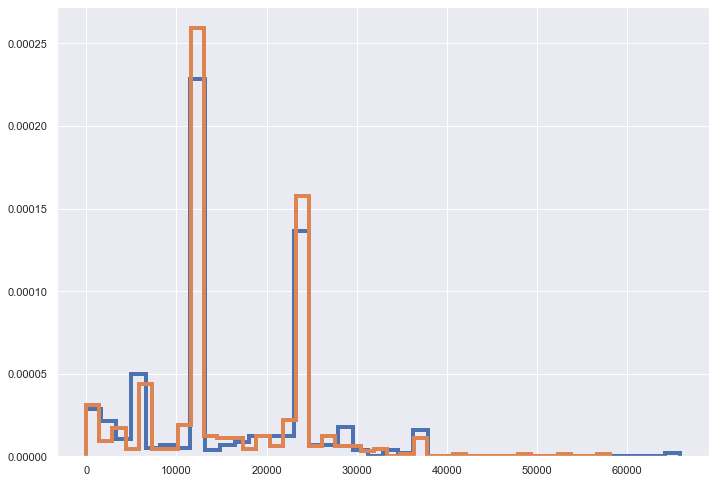

In [69]:
min_pension.loc[np.intersect1d(df_funnel.query('sale_flg == 1').index, min_pension.index)].hist(bins=40, density=True, histtype='step', linewidth=4)
min_pension.loc[np.intersect1d(df_funnel.query('sale_flg == 0').index, min_pension.index)].hist(bins=40, density=True, histtype='step', linewidth=4)

<AxesSubplot:>

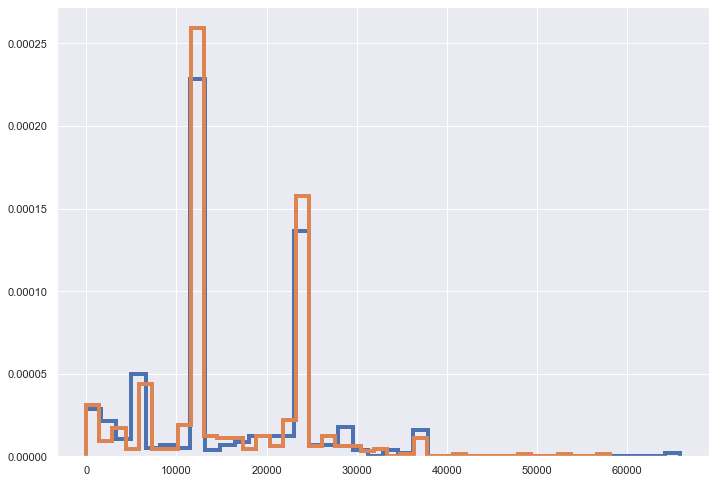

In [70]:
min_pension.loc[np.intersect1d(df_funnel.query('sale_flg == 1').index, min_pension.index)].hist(bins=40, density=True, histtype='step', linewidth=4)
min_pension.loc[np.intersect1d(df_funnel.query('sale_flg == 0').index, min_pension.index)].hist(bins=40, density=True, histtype='step', linewidth=4)

In [71]:
max_pension = df_payments.query('pmnts_name == "Pension receipts"').groupby('client_id').sum_rur.max()
max_pension

client_id
-9216473704060526660    12141.0
-9210484825961669240    24282.0
-9209732247128824451     3718.0
-9198654031673722494    24199.0
-9197872890596891221    12141.0
                         ...   
 9157380216762169201     3718.0
 9175438673891918463    12141.0
 9178680470928980533    12141.0
 9182169606313054731    24282.0
 9220335314469087849    12141.0
Name: sum_rur, Length: 1202, dtype: float64

In [72]:
sum(max_pension > 80000)

5

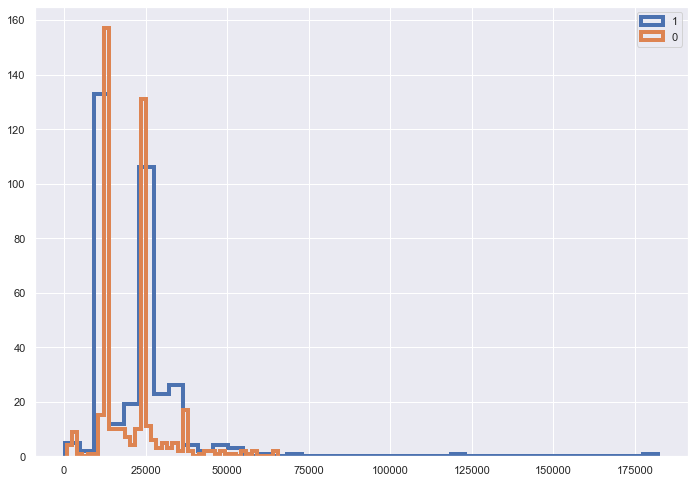

In [73]:
max_pension.loc[np.intersect1d(df_funnel.query('sale_flg == 1').index, max_pension.index)].hist(bins=40, density=False, histtype='step', linewidth=4, label='1')
max_pension.loc[np.intersect1d(df_funnel.query('sale_flg == 0').index, max_pension.index)].hist(bins=40, density=False, histtype='step', linewidth=4, label='0')
plt.legend()

In [74]:
mean_pension = df_payments.query('pmnts_name == "Pension receipts"').groupby('client_id').sum_rur.mean()
mean_pension

client_id
-9216473704060526660    10117.666667
-9210484825961669240    24282.000000
-9209732247128824451     3668.454545
-9198654031673722494    23967.888889
-9197872890596891221    12141.000000
                            ...     
 9157380216762169201     3668.454545
 9175438673891918463    10117.666667
 9178680470928980533    12141.000000
 9182169606313054731    24282.000000
 9220335314469087849    12141.000000
Name: sum_rur, Length: 1202, dtype: float64

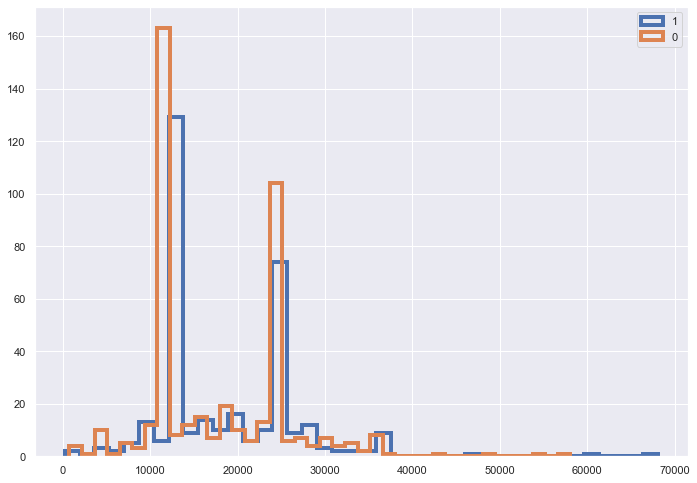

In [75]:
mean_pension.loc[np.intersect1d(df_funnel.query('sale_flg == 1').index, mean_pension.index)].hist(bins=40, density=False, histtype='step', linewidth=4, label='1')
mean_pension.loc[np.intersect1d(df_funnel.query('sale_flg == 0').index, mean_pension.index)].hist(bins=40, density=False, histtype='step', linewidth=4, label='0')
plt.legend()

## client

In [76]:
df_client

,client_id,gender,age,region,city,citizenship,education,job_type
0,7513301859607023584,F,33.0,0,115,RUSSIA,NaN,NaN
1,9157009756404187626,F,59.0,17,668,RUSSIA,NaN,NaN
2,-1893104556496814867,M,51.0,28,65,RUSSIA,NaN,NaN
3,6886062013213911831,F,56.0,0,40,RUSSIA,NaN,NaN
4,-8156468515495593794,F,34.0,-1,-1,RUSSIA,HIGHER_PROFESSIONAL,NaN
...,...,...,...,...,...,...,...,...
21493,4662551505651924284,M,31.0,0,14,RUSSIA,NaN,NaN
21494,-8968737688687691353,M,53.0,25,33,RUSSIA,NaN,NaN
21495,-5799097497074119478,F,57.0,12,225,RUSSIA,NaN,NaN
21496,-2264802671063321355,M,37.0,37,368,RUSSIA,MIDDLE_PROFESSIONAL,NaN


In [77]:
df_client.city.value_counts(dropna=False)

13      1354
33      1086
1       1084
205      499
42       453
        ... 
1254       1
3255       1
3207       1
3159       1
4094       1
Name: city, Length: 2546, dtype: int64

<AxesSubplot:>

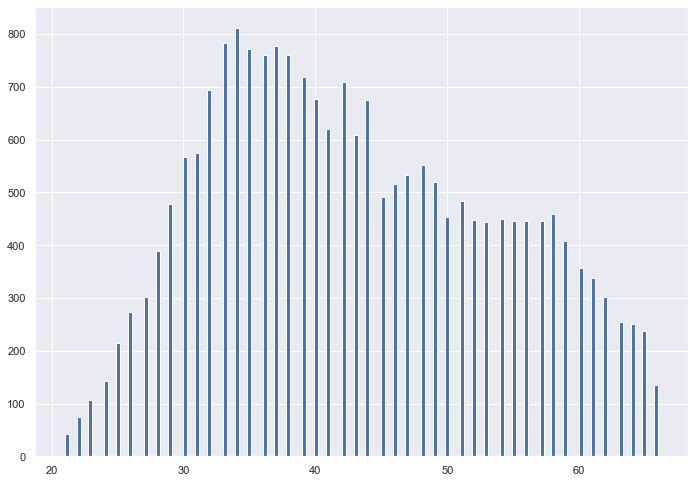

In [78]:
df_client.age.hist(bins=150, )

## trxn

In [79]:
df_trxn

,client_id,card_id,tran_time,tran_amt_rur,mcc_cd,merchant_cd,txn_country,txn_city,tsp_name,txn_comment_1,txn_comment_2
0,-1893104556496814867,-6909844117230568380,2019-07-01 00:00:00,6071.0,6011.0,3796217713062573289,RUS,N. NOVGOROD,MOLODEZHNYY PR. DEPO,Cash withdrawal through an ATM,NaN
1,-1893104556496814867,-6909844117230568380,2019-07-29 00:00:00,6071.0,6011.0,3796217713062573289,RUS,N. NOVGOROD,MOLODEZHNYY PR. DEPO,Cash withdrawal through an ATM,NaN
2,-1893104556496814867,-6909844117230568380,2019-08-31 00:00:00,7285.0,6011.0,3796217713062573289,RUS,N. NOVGOROD,MOLODEZHNYY PR. DEPO,Cash withdrawal through an ATM,NaN
3,6886062013213911831,6527755410945490683,2019-08-14 10:38:33,2428.0,6011.0,-774579209084196290,RUS,RADUZHNYI,TTS SITI,Cash withdrawal through an ATM,NaN
4,6886062013213911831,6527755410945490683,2019-07-17 12:27:58,6071.0,6011.0,-7735007003326589238,RUS,RADUZHNYI,ODTS AGANGRAD,Cash withdrawal through an ATM,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3035700,-3405096435133737788,-1484177776108621230,2018-09-06 07:41:17,728.0,6012.0,3967370607447365704,RUS,VISA DIRECT,VISA MONEY TRANSFER,Payment by card (bank transfer),VISA MONEY TRANSFER
3035701,5941620754379828660,-4513708287312715087,2018-12-02 08:16:48,2550.0,6012.0,3967370607447365704,RUS,VISA DIRECT,VISA MONEY TRANSFER,Payment by card (bank transfer),VISA MONEY TRANSFER
3035702,5941620754379828660,-4513708287312715087,2018-12-28 13:55:12,3642.0,6012.0,3967370607447365704,RUS,VISA DIRECT,VISA MONEY TRANSFER,Payment by card (bank transfer),VISA MONEY TRANSFER
3035703,2964514409686635938,4497627322591857070,2018-12-21 09:32:26,2792.0,6012.0,3967370607447365704,RUS,VISA DIRECT,VISA MONEY TRANSFER,Payment by card (bank transfer),VISA MONEY TRANSFER


In [80]:
df_trxn.txn_comment_1.value_counts()

Payment for goods and services     2546655
Cash withdrawal through an ATM      243562
Cashless transfer                   146586
Payment by card (bank transfer)      52325
Cash deposit by card                 36342
Return of goods / services            8979
Cash withdrawal                       1256
Name: txn_comment_1, dtype: int64

In [81]:
df_trxn.txn_comment_2.value_counts()

<manual mode>             157751
Opening Online            138906
Purchase payment (web)     93744
VISA MONEY TRANSFER         6511
MASTERCARD MONEYSEND           7
Name: txn_comment_2, dtype: int64

## com

In [82]:
df_com

,client_id,agr_flg,otkaz,dumaet,ring_up_flg,not_ring_up_flg,count_comm,month_end_dt,channel,prod
0,7513301859607023584,0,0,0,0,2,2,2018-12-31,CALL,Credit Card
1,7513301859607023584,0,0,0,0,2,2,2019-02-28,CALL,Credit Card
2,-8079817404148237243,0,0,0,2,0,2,2019-08-31,CALL,Credit Card
3,-8079817404148237243,0,0,0,2,0,2,2019-03-31,CALL,Credit Card
4,2897849887287086776,0,0,0,0,16,16,2019-02-28,CALL,Credit Card
...,...,...,...,...,...,...,...,...,...,...
113050,2307145364875101716,0,0,0,0,0,2,2019-05-31,SMS,Savings account
113051,-2262941530044003186,0,0,0,0,0,2,2019-05-31,SMS,Savings account
113052,-8788421051454805335,0,0,0,0,0,2,2019-05-31,SMS,Savings account
113053,-389524536695171379,0,0,0,0,0,2,2019-05-31,SMS,Savings account


In [83]:
df_com = df_com.set_index("client_id")

In [84]:
df_com['prod'].value_counts()

Cash Loan                       92816
Credit Card                     15115
Debit Card                       2109
Investment bundle                1057
Mortgage                          678
Currency exchange                 518
Not applicable                    387
Investment product                123
Savings account                    37
Integrated insurance product       30
Other                               5
Name: prod, dtype: int64

### agr_flg

In [85]:
cid_agr = df_com.query('agr_flg >= 1').index.unique()
cid_not_agr = df_com.query('agr_flg < 1').index.unique()
len(cid_agr), len(cid_not_agr)

(1600, 16466)

In [86]:
cid_agr_fun = np.intersect1d(cid_agr, cid_nan_edu)
cid_not_agr_fun = np.intersect1d(cid_not_agr, cid_nan_edu)
len(cid_agr_fun), len(cid_not_agr_fun)

(1142, 7823)

In [87]:
df_funnel.loc[cid_agr_fun].sale_flg.value_counts() #/ len(cid_agr_fun)

1    602
0    540
Name: sale_flg, dtype: int64

In [88]:
df_funnel.loc[cid_not_agr_fun].sale_flg.value_counts() #/ len(cid_not_agr_fun)

0    4803
1    3020
Name: sale_flg, dtype: int64

In [89]:
df_funnel.loc[cid_nan_edu].sale_flg.value_counts() #/ len(cid_nan_edu)

0    5770
1    3510
Name: sale_flg, dtype: int64

### multiple agreements

In [90]:
len(cid_agr_fun)

1142

<AxesSubplot:>

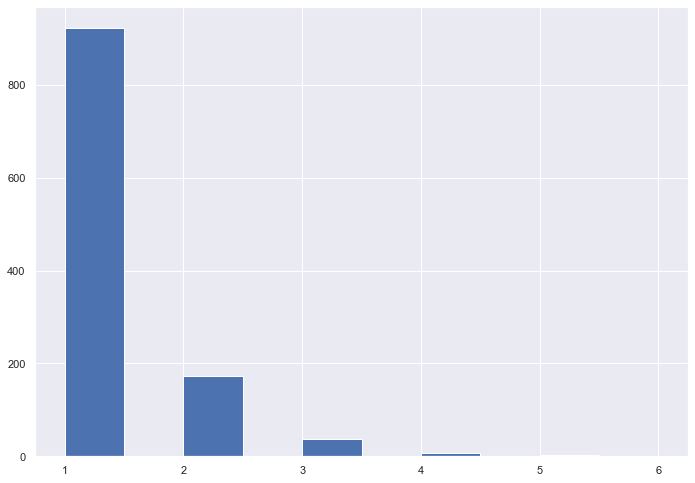

In [91]:
df_com.loc[cid_agr_fun].groupby('client_id').agr_flg.sum().hist()

In [92]:
cid_many_agr_fun = cid_agr_fun[df_com.loc[cid_agr_fun].groupby('client_id').agr_flg.sum() > 3]

In [93]:
df_funnel.loc[cid_many_agr_fun].sale_flg.value_counts() #/ len(cid_many_agr_fun)

1    10
0     1
Name: sale_flg, dtype: int64

In [94]:
sum(df_funnel.loc[cid_many_agr_fun].nic) / len(df_funnel)

44.70653017241379

### clean up subcategories?

In [95]:
sum(df_funnel.query('sale_flg == 1').nic) / len(df_funnel)

15408.919348060326

In [96]:
sum(df_funnel.loc[cid_agr_fun].query('sale_flg == 1').nic) / len(df_funnel)

3151.2696713362093

In [97]:
sum(df_funnel.loc[cid_agr_fun].nic) / len(df_funnel)

2834.028292025865

In [98]:
df_funnel.loc[cid_agr_fun].sale_flg.value_counts() #/ len(cid_agr_fun)

1    602
0    540
Name: sale_flg, dtype: int64

In [99]:
cid_sflg_0 = df_funnel.query('sale_flg == 0').index.unique()
cid_sflg_1 = df_funnel.query('sale_flg == 1').index.unique()
len(cid_sflg_0), len(cid_sflg_1)

(5770, 3510)

In [100]:
df_com_sflg_0 = df_com.loc[np.intersect1d(cid_sflg_0, df_com.index)]
df_com_sflg_1 = df_com.loc[np.intersect1d(cid_sflg_1, df_com.index)]

#### agr_flg

In [101]:
df_com_sflg_0.groupby('client_id').agr_flg.sum().value_counts()

0    4274
1     452
2      75
3      12
6       1
Name: agr_flg, dtype: int64

In [102]:
df_com_sflg_1.groupby('client_id').agr_flg.sum().value_counts()

0    2424
1     470
2      97
3      25
4       8
5       2
Name: agr_flg, dtype: int64

In [103]:
cid_not_agr = df_com.query('agr_flg == 0').index.unique()
cid_not_agr

Int64Index([ 7513301859607023584, -8079817404148237243,  2897849887287086776,
             4497537671718296975,  6993413286470994550, -5830927494923600943,
            -8173149418989047002,  2790171791554172197,  7204827006754532528,
            -9204276027106380024,
            ...
            -3895371027463171998,   185380171625760536,  6572385981809905212,
            -6512662144778394772,  4283004478738429971, -3435670659717479552,
            -8486881008985080921, -1057496898447530204, -1035010166850045417,
            -8788421051454805335],
           dtype='int64', name='client_id', length=16466)

In [104]:
test_nic = df_funnel.nic
test_nic

client_id
-8156468515495593794    134018.05
-2918739578801888500    117907.95
-4569470415387261653     -8000.00
 497866795935220651      -4000.00
-1093433514453846397     -4000.00
                          ...    
-8727103852075923180     17016.60
 8867503270592066463     42289.70
 6124360150058591747     -4000.00
 6304729431024445752     48367.45
-2264802671063321355     35882.85
Name: nic, Length: 9280, dtype: float64

In [105]:
len(np.intersect1d(cid_not_agr, cid_nan_edu))

7823

In [106]:
test_nic.loc[np.intersect1d(cid_not_agr, cid_nan_edu)] = 0


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [107]:
test_nic

client_id
-8156468515495593794         0.00
-2918739578801888500    117907.95
-4569470415387261653         0.00
 497866795935220651          0.00
-1093433514453846397     -4000.00
                          ...    
-8727103852075923180         0.00
 8867503270592066463     42289.70
 6124360150058591747     -4000.00
 6304729431024445752         0.00
-2264802671063321355     35882.85
Name: nic, Length: 9280, dtype: float64

In [108]:
sum(test_nic)/len(df_funnel)

1135.4969881465513

#### calls

In [109]:
df_com

,agr_flg,otkaz,dumaet,ring_up_flg,not_ring_up_flg,count_comm,month_end_dt,channel,prod
client_id,,,,,,,,,
7513301859607023584,0,0,0,0,2,2,2018-12-31,CALL,Credit Card
7513301859607023584,0,0,0,0,2,2,2019-02-28,CALL,Credit Card
-8079817404148237243,0,0,0,2,0,2,2019-08-31,CALL,Credit Card
-8079817404148237243,0,0,0,2,0,2,2019-03-31,CALL,Credit Card
2897849887287086776,0,0,0,0,16,16,2019-02-28,CALL,Credit Card
...,...,...,...,...,...,...,...,...,...
2307145364875101716,0,0,0,0,0,2,2019-05-31,SMS,Savings account
-2262941530044003186,0,0,0,0,0,2,2019-05-31,SMS,Savings account
-8788421051454805335,0,0,0,0,0,2,2019-05-31,SMS,Savings account


<AxesSubplot:>

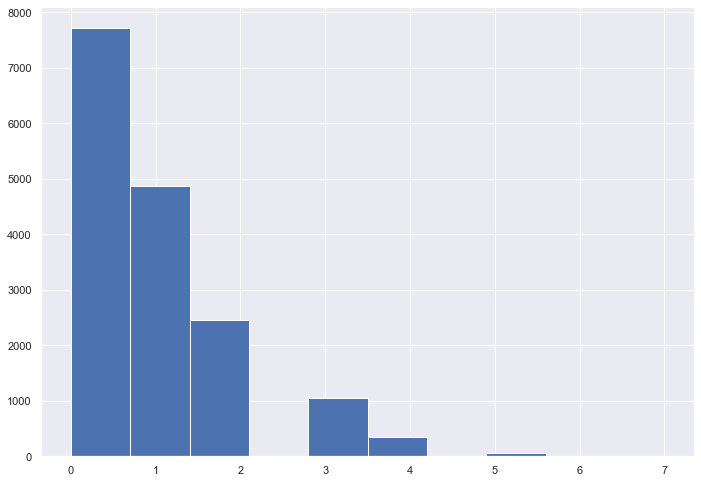

In [110]:
df_com.groupby('client_id').otkaz.sum().hist(bins=10)

## deals

In [111]:
df_deals

,client_id,agrmnt_start_dt,agrmnt_close_dt,crncy_cd,agrmnt_rate_active,agrmnt_rate_passive,agrmnt_sum_rur,prod_type_name
0,7513301859607023584,2010-08-12,2014-10-30,810.0,NaN,NaN,0.0,Cash on demand
1,7513301859607023584,2013-02-15,2013-08-16,810.0,NaN,NaN,0.0,Cash on demand
2,7513301859607023584,2013-08-16,2014-02-14,810.0,NaN,NaN,0.0,Cash on demand
3,7513301859607023584,2015-07-12,2015-07-12,810.0,NaN,NaN,0.0,Cash on demand
4,7513301859607023584,2015-07-12,2015-07-12,810.0,NaN,NaN,0.0,Cash on demand
...,...,...,...,...,...,...,...,...
109011,-8242641659611256965,2011-08-10,2011-08-10,810.0,NaN,NaN,0.0,POST OFFICE
109012,-8242641659611256965,2011-08-10,2018-07-03,810.0,NaN,3.25,13089.0,POST OFFICE
109013,-8242641659611256965,2011-08-10,2011-08-10,810.0,NaN,NaN,0.0,POST OFFICE
109014,-8242641659611256965,2011-08-23,2012-09-18,810.0,NaN,7.00,5403.0,POST OFFICE


In [112]:
df_deals.agrmnt_rate_passive.value_counts(dropna=False)

NaN      60279
0.00     34063
0.10      2922
0.01      2126
4.00      1398
         ...  
9.67         1
9.33         1
13.99        1
2.55         1
3.71         1
Name: agrmnt_rate_passive, Length: 609, dtype: int64

In [113]:
df_deals = df_deals.set_index('client_id')

In [114]:
df_deals.prod_type_name.value_counts()

Salary cards                                   17472
Debit cards                                    13578
Credit cards                                   13525
Cash on demand                                 11009
Current account                                10676
BIN time deposits                               5154
Cash loans OP                                   4641
Savings account                                 4386
OD etc .                                        3660
Lending to payroll clients                      3141
Technical cards                                 2243
Special offers                                  2095
AP etc .                                        1378
Corporate lending                                766
SU etc .                                         753
RocketBank                                       671
Pension                                          592
Pension cash on demand                           512
Cash loans (x-sale)                           

In [115]:
df_deals.agrmnt_rate_active.value_counts()

0.00     3899
18.00    2962
16.00    2601
24.00     977
8.50      959
         ... 
19.25       1
8.65        1
54.00       1
7.60        1
11.27       1
Name: agrmnt_rate_active, Length: 315, dtype: int64

In [116]:
df_funnel.loc[np.intersect1d(df_deals.index.unique(), df_funnel.index)]

,sale_flg,sale_amount,contacts,feature_1,client_segment,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,region_cd,nic
client_id,,,,,,,,,,,,,,,,
-9220236243053692422,1,32920.90,2,1,3.0,3642369.0,24469.0,23073.0,16764.0,49060.0,1141276.0,436482.0,8.9,24474.0,36.0,24920.90
-9220233431709087652,0,0.00,1,6,1.0,1371274.0,77447.0,27857.0,61894.0,15563.0,1370745.0,1177470.0,11.9,30422.0,86.0,0.00
-9218923580775423458,1,65841.85,1,1,8.0,3520957.0,112431.0,28532.0,0.0,251026.0,3520957.0,3203783.0,10.9,76379.0,78.0,61841.85
-9217522148893126271,1,8278.15,2,8,7.0,2428246.0,10156.0,27712.0,0.0,65304.0,418872.0,331124.0,15.9,10164.0,86.0,0.00
-9216562154770464646,1,20411.00,4,1,16.0,1563042.0,49642.0,8180.0,54507.0,26663.0,1562576.0,1259809.0,9.4,33509.0,86.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210268912367210109,1,39505.05,1,8,4.0,1942452.0,186626.0,62247.0,0.0,289176.0,1942597.0,1668691.0,17.9,49224.0,77.0,0.00
9213178145161007127,1,39804.15,1,1,4.0,2921272.0,90305.0,62373.0,0.0,63942.0,2762130.0,2528454.0,10.9,90298.0,61.0,0.00
9216281001619457018,0,0.00,2,9,5.0,1821184.0,103380.0,51232.0,0.0,178757.0,1821184.0,694561.0,19.4,47644.0,60.0,0.00


## appl

In [117]:
df_appl

,client_id,month_end_dt,appl_prod_group_name,appl_prod_type_name,appl_stts_name_dc,appl_sale_channel_name
0,6886062013213911831,2018-10-31,PILS,PILS,The consultation is over,Network
1,4497537671718296975,2018-10-31,PILS,PILS,The consultation is over,Network
2,1316154201527307743,2018-09-30,PILS,PILS,The consultation is over,Network
3,1316154201527307743,2018-09-30,PILS,PILS,The consultation is over,Network
4,1316154201527307743,2018-09-30,PILS,PILS,The consultation is over,Network
...,...,...,...,...,...,...
12025,-7051552770088413806,2019-03-31,Mortgage,Mortgage,four,NaN
12026,-2283863549841851654,2019-02-28,Mortgage,Mortgage,four,NaN
12027,4409001434092016310,2019-03-31,Mortgage,Mortgage,2,NaN
12028,-2119157901008689776,2018-11-30,Cards,Credit cards,Issuing a card,UCHK


In [118]:
df_appl = df_appl.set_index('client_id')

In [119]:
len(df_appl.index.unique())

6209

### stts

In [120]:
df_appl.appl_stts_name_dc.value_counts()

Issuance has been made                     4667
Issuing a card                             1255
The consultation is over                    828
Informing the Methodics                     828
Attachment of documents (after release)     599
Draft                                       153
Client refusal (Methodics)                   84
Bank refusal (sent to Methodics)             34
The documents have been prepared             34
An agreement is required to be signed        16
Client refusal                               16
Formation of the application                 16
Verification of customer data                 7
Attachment of documents                       7
four                                          5
Getting a list of customer cards              5
Waiting for contract data                     2
To issue                                      2
Confirmation of issue by the Controller       2
one                                           2
five                                    

In [121]:
message = "Issuing a card"
messafe_id = np.intersect1d(df_appl.query(f'appl_stts_name_dc == "{message}"').index.unique(), df_funnel.index)

In [122]:
df_funnel.loc[messafe_id].sale_flg.value_counts() / len(messafe_id)

0    0.79058
1    0.20942
Name: sale_flg, dtype: float64

### channel

In [123]:
df_appl.appl_sale_channel_name.value_counts()

Network                  6836
Direct sales             3111
Telesales                1150
DRKK                      776
Premium                    51
Sales to FC employees      30
Heavy network               5
Mini-offices                4
UCHK                        2
SME                         1
Name: appl_sale_channel_name, dtype: int64

In [124]:
channel_id = np.intersect1d(df_appl[df_appl['appl_sale_channel_name'] == "Premium"].index.unique(), df_funnel.index)

In [125]:
df_funnel.loc[channel_id].sale_flg.value_counts() / len(channel_id)

0    0.5
1    0.5
Name: sale_flg, dtype: float64

### group

In [126]:
df_appl.appl_prod_group_name.value_counts()

Cards       8307
PILS        3689
Mortgage      34
Name: appl_prod_group_name, dtype: int64

In [127]:
group_id = np.intersect1d(df_appl[df_appl['appl_prod_group_name'] == "Mortgage"].index.unique(), df_funnel.index)

In [128]:
df_funnel.loc[group_id].sale_flg.value_counts() / len(group_id)

0    0.538462
1    0.461538
Name: sale_flg, dtype: float64

### prod_type

In [129]:
df_appl.appl_prod_type_name.value_counts()

Debit cards     4749
PILS            3689
Credit cards    3558
Mortgage          34
Name: appl_prod_type_name, dtype: int64

In [130]:
type_id = np.intersect1d(df_appl[df_appl['appl_prod_type_name'] == "Debit cards"].index.unique(), df_funnel.index)

In [131]:
df_funnel.loc[type_id].sale_flg.value_counts() / len(type_id)

0    0.618923
1    0.381077
Name: sale_flg, dtype: float64